In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Variable Delay Branch
k_variable_holders = []

with h5.File("C:/Users/haoyuan/Desktop/Research/Projects/Split Delay Design/instability_inclined.h5", 'r') as source:
    name_list = list(source.keys())
    for k in list(source.keys()):
        print(k)
        k_variable_holders.append(np.array(source[k]))
        #print(source[k].shape)

# ===============================================================================================================
k_fixed_holders = []

with h5.File("C:/Users/haoyuan/Desktop/Research/Projects/Split Delay Design/instability_fixed.h5", 'r') as source:
    for k in list(source.keys()):
        #print(k)
        k_fixed_holders.append(np.array(source[k]))
        #print(source[k].shape)


crystal 0 x axis
crystal 0 y axis
crystal 0 z axis
crystal 1 x axis
crystal 1 y axis
crystal 1 z axis
crystal 2 x axis
crystal 2 y axis
crystal 2 z axis
crystal 3 x axis
crystal 3 y axis
crystal 3 z axis
grating 1 x axis
grating 1 y axis
grating 1 z axis
grating 2 x axis
grating 2 y axis
grating 2 z axis


# Get the unperturbed wave vector

In [3]:
k0_fix = k_fixed_holders[0][100]
print(k0_fix)

k0_var = k_variable_holders[0][100]
print(k0_var)

[ 0.00000000e+00 -1.29034561e-11  5.06773076e+04]
[1.48662843e-07 8.97680939e-07 5.06773076e+04]


# Calculate the momentum difference

In [4]:
k_fix = np.stack(k_fixed_holders)
k_fix_diff = k_fix - k0_fix[np.newaxis, np.newaxis, :]

k_var = np.stack(k_variable_holders)
k_var_diff = k_var - k0_var[np.newaxis, np.newaxis, :]

# plot the differences

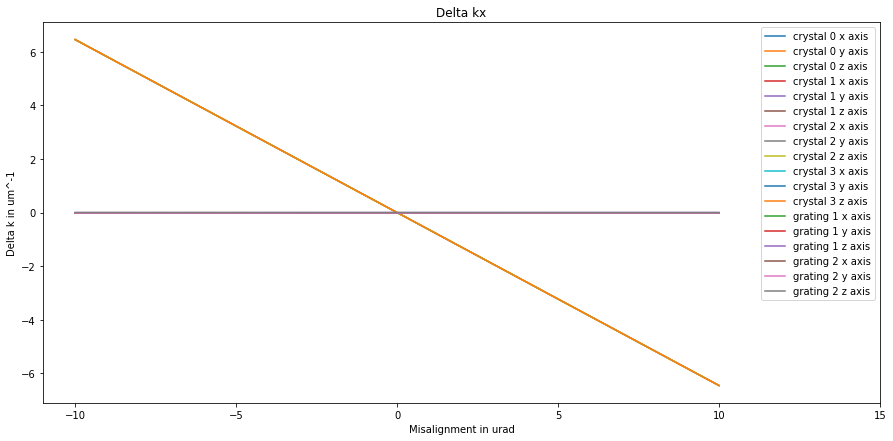

In [5]:
plt.figure(figsize=(15, 7))

for x in range(18):
    plt.plot(np.arange(-100, 101) / 10., k_fix_diff[x, :, 0] / k0_var[-1] * 1e6, label=name_list[x])

plt.xlim([-11, 15])

plt.ylabel("Delta k in um^-1")
plt.xlabel("Misalignment in urad")
plt.title("Delta kx")

plt.legend()
plt.show()

# Fit the Deviation Matrix

In [6]:
gradient_fix_holder = np.zeros((3, 18))

angles = np.arange(-100, 101) / 10.  # urad

for x in range(18):
    for y in range(3):
        
        # Linear fit slope
        slope, intercept, r_value, p_value, std_err = linregress(angles, k_fix_diff[x, :, y])

        # Slope through the origin
        slope_o = np.dot(angles, k_fix_diff[x, :, y]) / np.dot(angles, angles)
        
        #print(slope - slope_o)
        
        gradient_fix_holder[y, x] = slope_o

In [7]:
gradient_var_holder = np.zeros((3, 18))

angles = np.arange(-100, 101) / 10.  # urad

for x in range(18):
    for y in range(3):
        
        # Linear fit slope
        slope, intercept, r_value, p_value, std_err = linregress(angles, k_var_diff[x, :, y])

        # Slope through the origin
        slope_o = np.dot(angles, k_var_diff[x, :, y]) / np.dot(angles, angles)
        
        #print(slope - slope_o)
        
        gradient_var_holder[y, x] = slope_o

In [8]:
print(gradient_var_holder.T)

[[ 3.35698181e-02  1.01354373e-01 -3.04063118e-05]
 [ 0.00000000e+00  4.77489917e-31  0.00000000e+00]
 [-3.27217171e-02  4.71571008e-07 -1.40993049e-10]
 [-2.51773778e-02 -1.01354511e-01  3.04063531e-05]
 [-2.36792332e-35  4.77489917e-31  0.00000000e+00]
 [-3.27217062e-02  4.71571371e-07 -1.41210994e-10]
 [ 8.39246593e-03  1.01354632e-01 -3.04063913e-05]
 [ 4.73584665e-35  0.00000000e+00  0.00000000e+00]
 [-3.27217843e-02  1.70128076e-13  6.96737185e-14]
 [ 0.00000000e+00 -1.01354615e-01  3.04063864e-05]
 [ 0.00000000e+00  4.77489917e-31  0.00000000e+00]
 [-3.27217952e-02 -1.50205340e-24  2.62859345e-24]
 [-1.50861677e-09  1.22221765e-11  1.52031923e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.52031560e-05  2.19104986e-10 -8.42965977e-14]
 [ 0.00000000e+00  3.66712256e-28 -1.52031923e-05]
 [ 0.00000000e+00 -3.03094186e-33  0.00000000e+00]
 [ 1.52031923e-05  3.66712256e-28  0.00000000e+00]]


# Add constrains from channel-cut crystals.

In [9]:
constrain = np.zeros((18, 12))

cc_constrain = np.zeros((6, 3))
eye = np.eye(3)
eye[-1, -1]= -1

cc_constrain[:3,:] =np.eye(3)
cc_constrain[3:,:] = eye

constrain[:6, :3] = cc_constrain[:]
constrain[6:12, 3:6] = cc_constrain[:]

constrain[12:, 6:] = np.eye(6)

In [10]:
gradient_fix_cc = gradient_fix_holder.dot(constrain)

gradient_var_cc = gradient_var_holder.dot(constrain)

In [11]:
print(gradient_fix_cc.T)

[[ 0.00000000e+00  1.61259894e-14  1.61282188e-15]
 [ 0.00000000e+00 -2.86493950e-30 -2.48294757e-29]
 [ 1.38777878e-17 -4.00547574e-24 -6.13338472e-24]
 [ 0.00000000e+00  4.81836793e-14 -1.63432127e-14]
 [ 0.00000000e+00 -1.43246975e-30 -1.24147378e-29]
 [-6.93889390e-18 -3.00410680e-24 -1.25171117e-25]
 [ 0.00000000e+00  8.76303315e-14 -1.52031923e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.52031923e-05  9.77899350e-28 -1.14597580e-29]
 [ 0.00000000e+00 -3.66712256e-28  1.52031923e-05]
 [ 0.00000000e+00  3.03094186e-33  0.00000000e+00]
 [-1.52031923e-05 -3.66712256e-28  0.00000000e+00]]


In [12]:
print(gradient_var_cc.T)

[[ 8.39244032e-03 -1.37786635e-07  4.13126443e-11]
 [-2.36792332e-35  9.54979834e-31  0.00000000e+00]
 [-1.08985122e-08 -3.62486049e-13  2.17945413e-13]
 [ 8.39246593e-03  1.68445579e-08 -4.90479324e-12]
 [ 4.73584665e-35  4.77489917e-31  0.00000000e+00]
 [ 1.08984438e-08  1.70128076e-13  6.96737185e-14]
 [-1.50861677e-09  1.22221765e-11  1.52031923e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.52031560e-05  2.19104986e-10 -8.42965977e-14]
 [ 0.00000000e+00  3.66712256e-28 -1.52031923e-05]
 [ 0.00000000e+00 -3.03094186e-33  0.00000000e+00]
 [ 1.52031923e-05  3.66712256e-28  0.00000000e+00]]


In [13]:
print(gradient_var_holder[0,0] * 10 / k0_var[-1] * 1e6)

6.624230781286046


In [14]:
print(gradient_var_cc[0,0] * 10 / k0_var[-1] * 1e6)

1.6560548935445354
